## Telecom Churn - Group Case Study 
### Problem Statement 
Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [529]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#display column and rows customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [530]:
# Reading csv File 

df = pd.read_csv(r"E:\DataScience\Machine Learning\ML 2 CaseStudy\telecom_churn_data.csv")

In [531]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [532]:
df.shape 

(99999, 226)

There are 99999 rows and 226 columns in dataframe

In [533]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

There are 214 numberic features and 12 non-numberic features

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Out of 226 columns 
1. 179 are float type
2. 35 are int type
3. 12 are object type

In [536]:
# printing columns with missing values 

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 0])

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

There are 166 columns with missing values

In [537]:
# find columns with unique values in each row or same values in each row

uniCols = df.nunique()
print(uniCols[uniCols.values == 1])
print(uniCols[uniCols.values == 99999])

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64
mobile_number    99999
dtype: int64


There are 17 such columns 
Out of which 16 have same value in every row 
and mobile number column in unique for each row
Therefore, we can safely drop them as they wont be used for modelling 

In [538]:
# above mentioned columns have same values or all unique values 
# therefore they are safe to be droped 

# Dropping above columns that are not needed for modelling
df.drop(['circle_id','mobile_number',
        'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
         'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
         'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
         'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis = 1 , inplace = True)


In [539]:
df.shape

(99999, 209)

columns dropped successfully 

In [540]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20

In [541]:
# check percentage of missing values on columns more than 50

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 50])

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [542]:
# check data of above columns

df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_3g_6','count_rech_2g_6',
   'av_rech_amt_data_6','arpu_2g_6','arpu_3g_6','night_pck_user_6','fb_user_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_3g_6,count_rech_2g_6,av_rech_amt_data_6,arpu_2g_6,arpu_3g_6,night_pck_user_6,fb_user_6
0,6/21/2014,1.0,252.0,1.0,0.0,252.0,212.17,212.17,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/4/2014,1.0,56.0,0.0,1.0,56.0,0.00,0.00,0.0,0.0


Date of recharge cannot be imputed it will add bias and currupt the data.
Therefore, deleting those column 
1. date_of_last_rech_data_6
2. date_of_last_rech_data_7
3. date_of_last_rech_data_8
4. date_of_last_rech_data_9

And imputing values in other columns with 0 value

In [543]:
# dropping above mentioned columns

df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
         'date_of_last_rech_data_9'] , axis = 1 , inplace = True)

In [544]:
# out of the above mentioned features many of them are required for analysis of high value customer 
# lets impute these 0 values in place of missing values

df.fillna({'total_rech_data_6' : 0,'total_rech_data_7' : 0,'total_rech_data_8' : 0,'total_rech_data_9' : 0,
   'max_rech_data_6' : 0,'max_rech_data_7' : 0,'max_rech_data_8' : 0,'max_rech_data_9' : 0,
   'count_rech_3g_6' : 0,'count_rech_3g_7' : 0,'count_rech_3g_8' : 0,'count_rech_3g_9' : 0,
   'count_rech_2g_6' : 0,'count_rech_2g_7' : 0,'count_rech_2g_8' : 0,'count_rech_2g_9' : 0,
   'av_rech_amt_data_6' : 0,'av_rech_amt_data_7' : 0,'av_rech_amt_data_8' : 0,'av_rech_amt_data_9' : 0,
   'arpu_2g_6' : 0,'arpu_2g_7' : 0,'arpu_2g_8' : 0,'arpu_2g_9' : 0,
   'arpu_3g_6' : 0,'arpu_3g_7' : 0,'arpu_3g_8' : 0,'arpu_3g_9' : 0,
   'night_pck_user_6' : 0,'night_pck_user_7' : 0,'night_pck_user_8' : 0,'night_pck_user_9' : 0,
   'fb_user_6' : 0, 'fb_user_7' : 0, 'fb_user_8' : 0, 'fb_user_9' : 0
          }, inplace = True)


In [545]:
df.shape

(99999, 205)

In [546]:
# again check percentage of missing values on columns more than 50

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 50])

Series([], dtype: float64)


In [547]:
# all columns with more than 50% missing values are imputed 
# check data of above columns

df[['total_rech_data_6','max_rech_data_6','count_rech_3g_6','count_rech_2g_6',
   'av_rech_amt_data_6','arpu_2g_6','arpu_3g_6','night_pck_user_6','fb_user_6']].head()

,total_rech_data_6,max_rech_data_6,count_rech_3g_6,count_rech_2g_6,av_rech_amt_data_6,arpu_2g_6,arpu_3g_6,night_pck_user_6,fb_user_6
0,1.0,252.0,1.0,0.0,252.0,212.17,212.17,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
4,1.0,56.0,0.0,1.0,56.0,0.00,0.00,0.0,0.0


In [548]:
# check columns with more than 7% missing values
# missing values > 7%

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 7])

onnet_mou_9         7.745077
offnet_mou_9        7.745077
roam_ic_mou_9       7.745077
roam_og_mou_9       7.745077
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
loc_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
std_og_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
std_og_mou_9        7.745077
isd_og_mou_9        7.745077
spl_og_mou_9        7.745077
og_others_9         7.745077
loc_ic_t2t_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
loc_ic_mou_9        7.745077
std_ic_t2t_mou_9    7.745077
std_ic_t2m_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
std_ic_mou_9        7.745077
spl_ic_mou_9        7.745077
isd_ic_mou_9        7.745077
ic_others_9         7.745077
dtype: float64


In [549]:
#get columns list 

df[list((col[col.values > 7]).index)]

#list((col[col.values > 7]).index)

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,116.09,56.93,0.00,173.03,0.00,15.01,0.00,15.01,0.00,0.00,0.00
2,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.00,18.04,0.00,42.08,0.00,148.23,38.98,158.19,345.41,49.44,118.18,3.86,171.49,0.45,0.01,0.36
3,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.00,236.21,0.00,43.29,0.00,41.73,52.86,65.59,160.19,129.84,13.98,0.00,143.83,0.55,0.00,0.80
4,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.00,0.00,0.00,5.98,0.00,154.56,48.24,0.00,202.81,2.31,0.00,0.00,2.31,0.18,0.00,0.00
5,138.79,46.91,0.00,0.00,138.79,44.78,2.13,0.00,185.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,68.38,84.01,0.00,152.39,0.00,0.00,52.03,52.03,0.53,0.00,0.43
6,15.23,50.33,0.00,0.00,15.23,50.33,0.00,0.00,65.56,0.00,0.00,0.00,0.00,0.00,0.00,0.35,2334.88,231.41,6.19,2572.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33.46,108.71,0.00,0.00,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,81.46,0.00,0.00,0.00,4.03,17.34,0.00,21.38,0.00,13.53,0.00,13.53,0.00,0.00,0.00
9,27.84,123.48,0.00,0.00,27.84,37.26,0.00,0.00,65.11,0.00,83.26,2.94,86.21,0.00,0.00,0.00,313.38,65.06,0.48,378.93,4.38,1.18,0.00,5.56,0.00,28.13,0.00


In [550]:
# from above it is observed that all column values for particular rows are nan 
# if the value is nan for one column it is the same for all the column values 

# so we can safely repalce then with zero 

df.fillna({'onnet_mou_9' : 0,
 'offnet_mou_9' : 0,
 'roam_ic_mou_9' : 0,
 'roam_og_mou_9' : 0,
 'loc_og_t2t_mou_9' : 0,
 'loc_og_t2m_mou_9' : 0,
 'loc_og_t2f_mou_9' : 0,
 'loc_og_t2c_mou_9' : 0,
 'loc_og_mou_9' : 0,
 'std_og_t2t_mou_9' : 0,
 'std_og_t2m_mou_9' : 0,
 'std_og_t2f_mou_9' : 0,
 'std_og_mou_9' : 0,
 'isd_og_mou_9' : 0,
 'spl_og_mou_9' : 0,
 'og_others_9' : 0,
 'loc_ic_t2t_mou_9' : 0,
 'loc_ic_t2m_mou_9' : 0,
 'loc_ic_t2f_mou_9' : 0,
 'loc_ic_mou_9' : 0,
 'std_ic_t2t_mou_9' : 0,
 'std_ic_t2m_mou_9' : 0,
 'std_ic_t2f_mou_9' : 0,
 'std_ic_mou_9' : 0,
 'spl_ic_mou_9' : 0,
 'isd_ic_mou_9' : 0,
 'ic_others_9' : 0}, inplace = True)

In [551]:
df[['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.00,0.0,0.00,0.0,116.09,56.93,0.00,173.03,0.00,15.01,0.00,15.01,0.00,0.00,0.00
2,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,18.04,0.0,42.08,0.0,148.23,38.98,158.19,345.41,49.44,118.18,3.86,171.49,0.45,0.01,0.36
3,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,236.21,0.0,43.29,0.0,41.73,52.86,65.59,160.19,129.84,13.98,0.00,143.83,0.55,0.00,0.80
4,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.00,0.0,5.98,0.0,154.56,48.24,0.00,202.81,2.31,0.00,0.00,2.31,0.18,0.00,0.00


In [552]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.0,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,0.16,0.00,NaN,NaN,4.13,0.00,NaN,NaN,1.15,0.00,NaN,NaN,5.44,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,5.44,0.00,NaN,NaN,0.0,0.00,NaN,NaN,0.0,0.00,NaN,NaN,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0

In [553]:
# now check for remaining columns with missing values

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 0])

onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2c_mou_6       3.937039
loc_og_t2c_mou_7       3.859039
loc_og_t2c_mou_8       5.378054
loc_og_mou_6           3.937039
loc_og_mou_7           3.859039
loc_og_mou_8           5.378054
std_og_t2t_mou_6       3.937039
std_og_t2t_mou_7       3.859039
std_og_t2t_mou_8       5.378054
std_og_t2m_mou_6       3.937039
std_og_t

In [554]:
col[col.values > 0].index

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

In [555]:
df[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9']].head(20)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.00,0.00,4.68,23.43,12.76,0.00,0.0,0.0,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,11.54,55.24,37.26,143.33,220.59,208.36,0.00,0.00,0.00,0.00,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.00,135.54,45.76,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.00,0.00,46.56,236.84,96.84,0.45,0.0,0.0,115.69,71.11,67.46,14.38,15.44,38.89,99.48,122.29,49.63,229.56,208.86,155.99,72.41,71.29,28.69,45.18,177.01,167.09,21.73,58.34,43.23,139.33,306.66,239.03,0.21,0.00,0.00,0.00,0.85,0.00,0.93,3.14,0.00,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,99.91,54.39,310.98,123.31,109.01,71.68,0.00,54.86,44.38,0.00,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.00,0.00,0.00,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.00,0.00,10.96,0.00,18.09,0.00,0.0,0.0,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,45.99,105.01,4.94,0.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,50.31,149.44,83.89,76.96,91.88,124.26,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,67.64,91.88,124.26,0.00,0.00,0.00,0.00,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,105.68,88.49,233.81,106.84,109.54,104.13,1.50,0.00,0.00,214.03,198.04,337.94,0.00,0.00,0.86,1.93,0.25,0.00,0.00,0.00,0.00,1.93,0.25,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.48,0.00,0.00,6/26/2014,7/28/2014,8/9/2014,9/28/2014
5,50.16,43.63,85.48,19.28,13.44,14.46,0.00,0.00,0.00,0.00,0.00,0.00,50.16,43.63,85.48,16.39,8.83,12.38,0.00,0.00,0.00,0.00,0.00,0.00,66.56,52.46,97.86,0.00,0.00,0.00,0.00,0.00,0.00,2.88,4.61,2.08,2.88,4.61,2.08,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,28.73,30.03,56.26,49.19,57.44,62.46,0.00,0.00,0.00,77.93,87.48,118.73,0.00,0.00,0.00,0.00,0.00,

In [558]:
# we will do the same thing as we did above

df.fillna({'onnet_mou_6' : 0, 'onnet_mou_7' : 0, 'onnet_mou_8' : 0, 'offnet_mou_6' : 0,'offnet_mou_7' : 0, 'offnet_mou_8' : 0, 
           'roam_ic_mou_6' : 0, 'roam_ic_mou_7' : 0,'roam_ic_mou_8' : 0, 'roam_og_mou_6' : 0, 'roam_og_mou_7' : 0, 'roam_og_mou_8' : 0,
           'loc_og_t2t_mou_6' : 0, 'loc_og_t2t_mou_7' : 0, 'loc_og_t2t_mou_8' : 0, 'loc_og_t2m_mou_6' : 0, 'loc_og_t2m_mou_7' : 0, 'loc_og_t2m_mou_8' : 0,
           'loc_og_t2f_mou_6' : 0, 'loc_og_t2f_mou_7' : 0, 'loc_og_t2f_mou_8' : 0, 'loc_og_t2c_mou_6' : 0, 'loc_og_t2c_mou_7' : 0, 'loc_og_t2c_mou_8' : 0,
           'loc_og_mou_6' : 0, 'loc_og_mou_7' : 0, 'loc_og_mou_8' : 0, 'std_og_t2t_mou_6' : 0,'std_og_t2t_mou_7' : 0, 'std_og_t2t_mou_8' : 0, 
           'std_og_t2m_mou_6' : 0,'std_og_t2m_mou_7' : 0, 'std_og_t2m_mou_8' : 0, 'std_og_t2f_mou_6' : 0,'std_og_t2f_mou_7' : 0, 'std_og_t2f_mou_8' : 0, 
           'std_og_mou_6' : 0, 'std_og_mou_7' : 0,'std_og_mou_8' : 0, 'isd_og_mou_6' : 0, 'isd_og_mou_7' : 0, 'isd_og_mou_8' : 0,
           'spl_og_mou_6' : 0, 'spl_og_mou_7' : 0, 'spl_og_mou_8' : 0, 'og_others_6' : 0,'og_others_7' : 0, 'og_others_8' : 0, 
           'loc_ic_t2t_mou_6' : 0, 'loc_ic_t2t_mou_7' : 0,'loc_ic_t2t_mou_8' : 0, 'loc_ic_t2m_mou_6' : 0, 'loc_ic_t2m_mou_7' : 0,'loc_ic_t2m_mou_8' : 0, 
           'loc_ic_t2f_mou_6' : 0, 'loc_ic_t2f_mou_7' : 0,'loc_ic_t2f_mou_8' : 0, 'loc_ic_mou_6' : 0, 'loc_ic_mou_7' : 0, 'loc_ic_mou_8' : 0,
           'std_ic_t2t_mou_6' : 0, 'std_ic_t2t_mou_7' : 0, 'std_ic_t2t_mou_8' : 0, 'std_ic_t2m_mou_6' : 0, 'std_ic_t2m_mou_7' : 0, 'std_ic_t2m_mou_8' : 0,
           'std_ic_t2f_mou_6' : 0, 'std_ic_t2f_mou_7' : 0, 'std_ic_t2f_mou_8' : 0,'std_ic_mou_6' : 0, 'std_ic_mou_7' : 0, 'std_ic_mou_8' : 0, 
           'spl_ic_mou_6' : 0,'spl_ic_mou_7' : 0, 'spl_ic_mou_8' : 0,'isd_ic_mou_6' : 0, 'isd_ic_mou_7' : 0,'isd_ic_mou_8' : 0, 
           'ic_others_6' : 0, 'ic_others_7' : 0, 'ic_others_8' : 0}, inplace = True)

In [559]:
# check for missing values more than zero percent

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 0])
print("---------------------------")
print(col[col.values > 0].index)

date_of_last_rech_6    1.607016
date_of_last_rech_7    1.767018
date_of_last_rech_8    3.622036
date_of_last_rech_9    4.760048
dtype: float64
---------------------------
Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')


In [560]:
df.shape

(99999, 205)

In [561]:
df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9']].head(10)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014
5,6/19/2014,7/17/2014,8/24/2014,9/28/2014
6,6/28/2014,7/31/2014,8/28/2014,9/28/2014
7,6/27/2014,7/25/2014,8/26/2014,9/30/2014
8,6/25/2014,7/31/2014,8/30/2014,9/30/2014
9,6/29/2014,7/23/2014,8/29/2014,9/20/2014


In [562]:
df.fillna({'date_of_last_rech_6' : df['date_of_last_rech_6'].mode()[0],
            'date_of_last_rech_7' : df['date_of_last_rech_7'].mode()[0],
            'date_of_last_rech_8' : df['date_of_last_rech_8'].mode()[0],
            'date_of_last_rech_9' : df['date_of_last_rech_9'].mode()[0]
          }, inplace = True)

In [563]:
# check for null values again 

col = ((df.isnull().sum()/len(df)) * 100)
print(col[col.values > 0])

Series([], dtype: float64)


In [564]:
# All the null values have been imputed 
# futher Let's look for columns having all values as 0.


zero_col=df.columns[(df == 0).all()]
print(zero_col)

Index([], dtype='object')


There are no column with all zero values 

In [565]:
# now lets check for columns having same value in all the rows 


uniCols = df.nunique()
print(uniCols[uniCols.values == 1])
print(uniCols[uniCols.values == 99999])

Series([], dtype: int64)
Series([], dtype: int64)


There are no columns with all unique or all same values in every row

In [566]:
# Lets check the dataset thats left 

df.shape 

(99999, 205)

There are 205 faetures available 
and Data of 99999 customers is available 

## Data Preparation 

#### Fixing Data Types

In [567]:
# check for Date columns in dayaframe 

date_col = list(df.filter(regex='date').columns)
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [568]:
df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [569]:
# Data is not avaialble in same format lets convert it into proper format

for col in date_col:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

In [570]:
# checking if the formatting is done properly 

df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28


In [571]:
print(df.shape)
df.head()

(99999, 205)


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,1

In [572]:
# number of columns ending with 6, 7, 8, 9, indicatin each months data 

print(len(df.filter(regex='_6').columns))
print(len(df.filter(regex='_7').columns))
print(len(df.filter(regex='_8').columns))
print(len(df.filter(regex='_9').columns))

50
50
50
50


In [573]:
# aug_vbc_3g   jul_vbc_3g   jun_vbc_3g   sep_vbc_3g 
# above mentioned columns are not according to pattern as followed by other features 

# lets rename them 

df.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7',
          'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'},axis = 1, inplace = True)

### Derive Variables

In [574]:
# Total Data Volumne = vol_2g + vol_3g

for i in range(6,10):
    df['vol_data_mb_'+str(i)] = (df['vol_2g_mb_'+str(i)]+df['vol_3g_mb_'+str(i)]).astype(int)

In [575]:
df.shape

(99999, 209)

#### Filtering High Value Customer

In [576]:
# definition - Those who have recharged with an amount more than or equal to X, 
#              where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
    
highCol = df.filter(regex = ('count')).columns 
df[highCol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Derive Variables

In [577]:
# Add derive variable
# Total rech data = count_rech_2g + count_rech_3g 

for i in range(6,10):
    df['total_rech_data_num_'+str(i)] = (df['count_rech_2g_'+str(i)]+df['count_rech_3g_'+str(i)]).astype(int)

In [578]:
# four new columns are added
df.shape

(99999, 213)

In [579]:
# Creating new feature: avg_rech_amt_ for all the months an also simultaneously imputing nan values if any 

for i in range(6,10):
    df['avg_rech_amt_'+str(i)] = round(df['total_rech_amt_'+str(i)]/df['total_rech_num_'+str(i)]+1,2)     

In [580]:
# it is observed that there are missing values lets impute them 

missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9']
df.fillna({'avg_rech_amt_6' : 0 ,'avg_rech_amt_7' : 0 ,'avg_rech_amt_8' : 0 ,'avg_rech_amt_9' : 0 }
                         , inplace = True)

In [581]:
# four new columns are added
df.shape 

(99999, 217)

In [582]:
for i in range(6,10):
    df['total_rech_amt_data_'+str(i)] = df['total_rech_data_num_'+str(i)]*df['av_rech_amt_data_'+str(i)]

In [583]:
# four new columns are added
df.shape

(99999, 221)

In [584]:
for i in range(6,10):
    df['total_month_rech_'+str(i)] = df['total_rech_amt_'+str(i)]+df['total_rech_amt_data_'+str(i)]
df.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [585]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(df.total_month_rech_6 + df.total_month_rech_7)/2

# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
highv_cutoff= np.percentile(avg_goodPhase,70)

# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
highv_users = df[avg_goodPhase >=  highv_cutoff]
highv_users.reset_index(inplace=True,drop=True)


In [586]:
# info regarding high value customer 

print(len(highv_users))
print(round(len(highv_users)/df.shape[0]*100))


30001
30


Total number of high value customer - 30001
Percentage of high value customers - 30%

In [588]:
df.shape

(99999, 225)

##### Now, After all the Data Cleaning there is Data for 225 features available for 99999 Customers

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [589]:
def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [590]:
highv_users['churn'] = getChurnStatus(highv_users,9)
print("There are {} users tagged as churners out of {} High-Value Customers."
      .format(len(highv_users[highv_users.churn == 1]),highv_users.shape[0]))
print("High-value Churn Percentage : {}%"
      .format(round(len(highv_users[highv_users.churn == 1])/highv_users.shape[0] *100,2)))

There are 2441 users tagged as churners out of 30001 High-Value Customers.
High-value Churn Percentage : 8.14%


There are just 8.14% churn cases.

## Data Analysis

In [591]:
# lets remove all columns in churn period

col9List = highv_users.filter(regex=('_9')).columns
highv_users.drop(col9List,axis=1,inplace=True)

In [592]:
highv_users.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,total_rech_data_num_6,total_rech_data_num_7,total_rech_data_num_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,1,1,1,91.50,85.00,127.00,252.0,252.0,252.0,614.0,504.0,504.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [593]:
# list of column which are not monthly columns

# first get the list of pr month column 
comcol = highv_users.filter(regex ='_6').columns
monthcol = [item.strip('_6') for item in comcol]
#monthcol

# get list of all month column 
allmonthcol = [x + s for s in ['_6','_7','_8'] for x in monthcol]
#allmonthcol

# get list of all non month column 
nonmonthcol = [col for col in highv_users.columns if col not in allmonthcol]
nonmonthcol

['aon', 'churn']

In [594]:
# Function to plot the histogram with labels

def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    plt.show()

In [595]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [596]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=highv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [597]:
def plot_byChurn(data,col):
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(highv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    return highv_users.groupby('churn')[colList].mean()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64


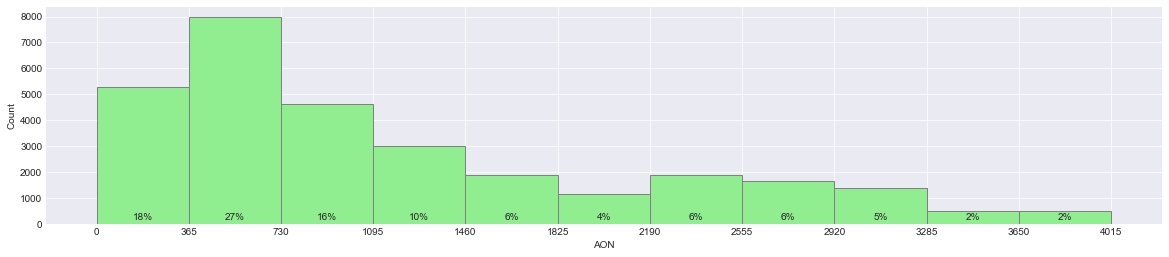

In [598]:
# plotting for non month column aon 

print(highv_users.aon.describe())
plot_hist(highv_users,'aon',365)

In [599]:
#Create Derived categorical variable

highv_users['aon_bin'] = pd.cut(df['aon'], range(0,df['aon'].max(),365), 
                             labels=range(0,int(round(df['aon'].max()/365))-1))

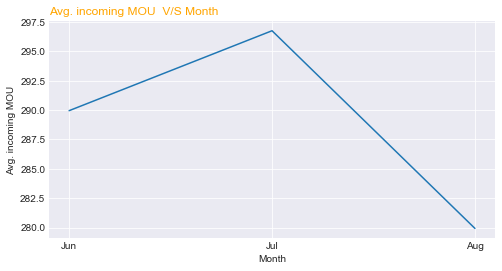

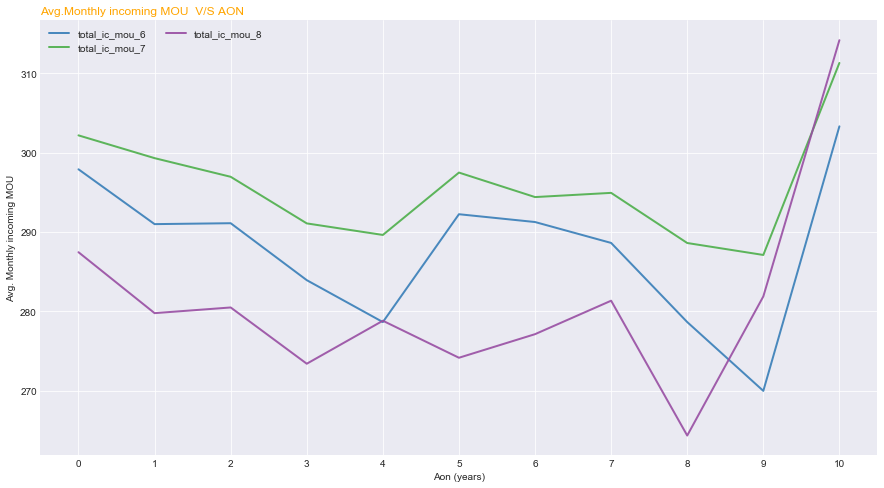

In [600]:
# Incoming VS month VS AON

ic_col = highv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',highv_users,calltype='incoming',colList=ic_col)
plot_avgMonthlyCalls('multi',highv_users,calltype='incoming',colList=ic_col)

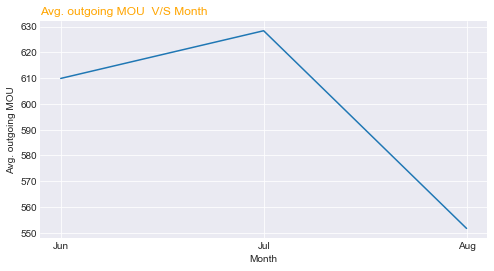

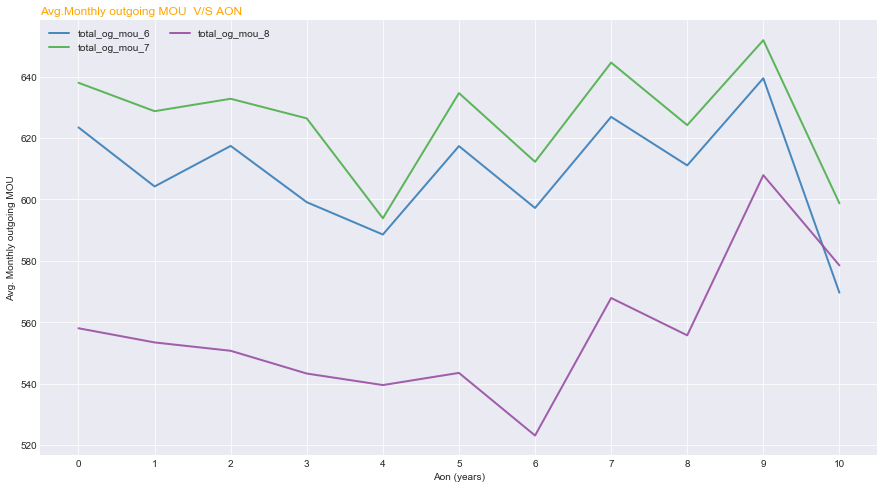

In [601]:
#Outgoing VS month VS AON

og_col = highv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',highv_users,calltype='outgoing',colList=og_col)
plot_avgMonthlyCalls('multi',highv_users,calltype='outgoing',colList=og_col)

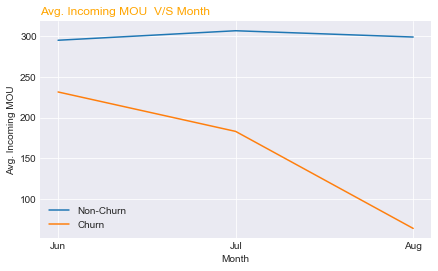

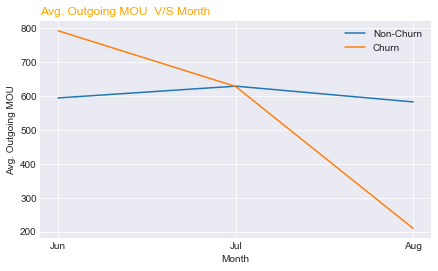

In [602]:
# Incoming/Outgoing MOU VS Churn

ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

In [603]:
# Avg.Incoming MOU per month churn vs Non-Churn

highv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [604]:
# Avg. Outgoing MOU per month churn vs Non-Churn

highv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


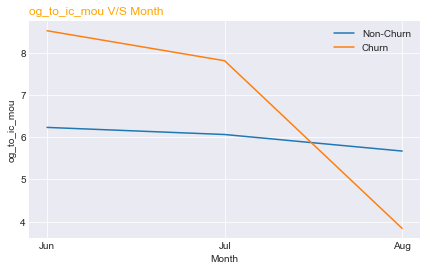

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.232771,6.064684,5.673024
1,8.520248,7.810618,3.842356


In [605]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.

for i in range(6,9):
    highv_users['og_to_ic_mou_'+str(i)] = (highv_users['total_og_mou_'+str(i)])/(highv_users['total_ic_mou_'+str(i)]+1)

plot_byChurn(highv_users,'og_to_ic_mou')

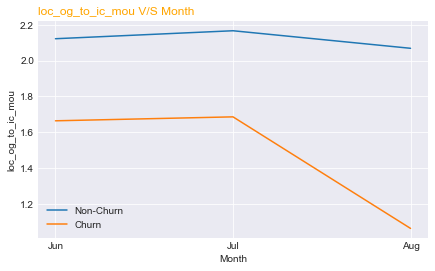

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8
churn,,,
0,2.121454,2.165918,2.068068
1,1.663975,1.685986,1.064218


In [606]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.

for i in range(6,9):
    highv_users['loc_og_to_ic_mou_'+str(i)] = (highv_users['loc_og_mou_'+str(i)])/(highv_users['loc_ic_mou_'+str(i)]+1)

plot_byChurn(highv_users,'loc_og_to_ic_mou')

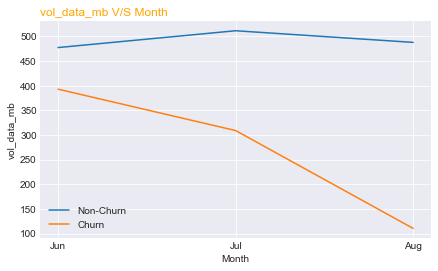

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,477.396226,511.506894,487.874238
1,392.945514,309.012290,110.481770


In [607]:
# Total data volume VS Churn

plot_byChurn(highv_users,'vol_data_mb')

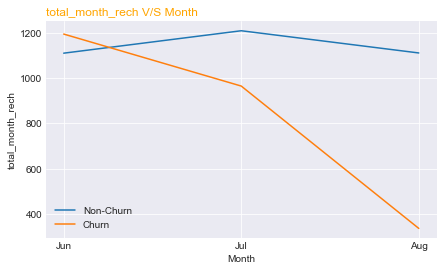

,total_month_rech_6,total_month_rech_7,total_month_rech_8
churn,,,
0,1109.651781,1208.584619,1110.586829
1,1193.936370,964.583806,336.676182


In [608]:
# Total monthly rech VS Churn

plot_byChurn(highv_users,'total_month_rech')

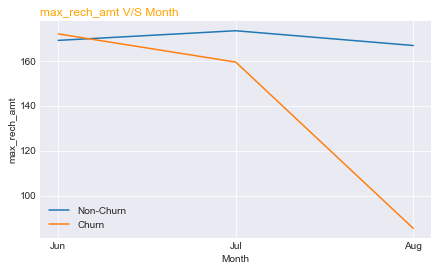

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.049456,173.336575,166.767199
1,171.942237,159.388775,85.370750


In [609]:
# max_rech_amt VS Churn

plot_byChurn(highv_users,'max_rech_amt')

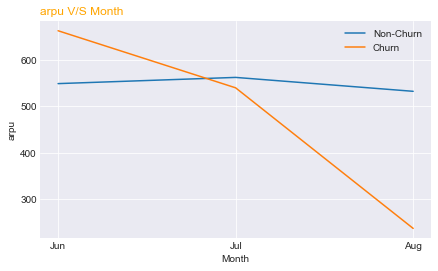

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


In [610]:
# arpu VS Churn

plot_byChurn(highv_users,'arpu')

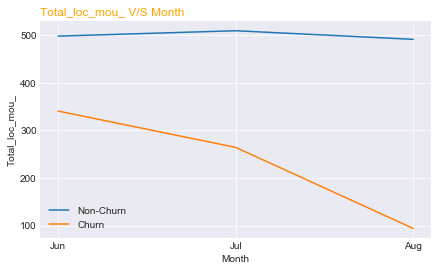

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.038143,509.358022,491.312215
1,340.671422,264.356186,94.092556


In [611]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8

for i in range(6,9):
    highv_users['Total_loc_mou_'+str(i)] = (highv_users['loc_og_mou_'+str(i)])+(highv_users['loc_ic_mou_'+str(i)])

plot_byChurn(highv_users,'Total_loc_mou_')

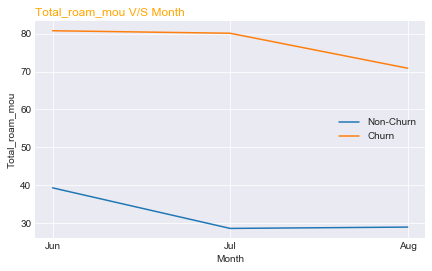

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.309139,28.604839,28.955369
1,80.761930,80.098779,70.875625


In [612]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8

for i in range(6,9):
    highv_users['Total_roam_mou_'+str(i)] = (highv_users['roam_ic_mou_'+str(i)])+(highv_users['roam_og_mou_'+str(i)])

plot_byChurn(highv_users,'Total_roam_mou')

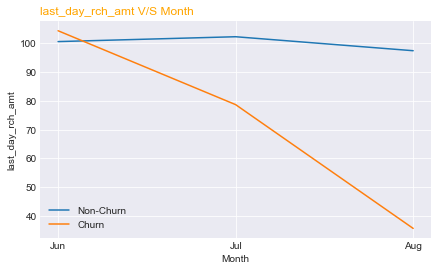

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.586938,102.275508,97.416800
1,104.356002,78.684146,35.680049


In [613]:
# last_day_rch_amt VS Churn

plot_byChurn(highv_users,'last_day_rch_amt')

## Modelling 

In [614]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [615]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [616]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [617]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [618]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [619]:
# creating copy of the final hv_user dataframe
highv_users_PCA = highv_users.copy()

# removing the columns not required for modeling
highv_users_PCA.drop(['aon_bin'], axis=1, inplace=True)

In [620]:
# removing the datatime columns before PCA

dateTimeCols = list(highv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
highv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [621]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = highv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = highv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [622]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [623]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)

# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [624]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 

Before OverSampling, churn event rate : 8.05% 



### The Data is imbalance. if the model is build using such data the moel wil be biased. To handle such imbalance in data we ill be using SMOTE

In [625]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [626]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38618, 178)
After OverSampling, the shape of train_y: (38618,) 

After OverSampling, counts of label '1': 19309
After OverSampling, counts of label '0': 19309
After OverSampling, churn event rate : 50.0% 



Now the data is balanced 
There is one another major problem observed i.e. the number of features available is high we can bulid model using such large number of features we will be using PCA for dimentionality reduction 


In [627]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [628]:
#Doing the PCA on the train data

pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [629]:
pca.explained_variance_ratio_[:50]

array([0.52550123, 0.11870038, 0.0813922 , 0.0462815 , 0.02641058,
       0.02312481, 0.01936384, 0.01887481, 0.01366903, 0.01107478,
       0.00876708, 0.00828941, 0.00718923, 0.00698485, 0.00609247,
       0.00525261, 0.00399358, 0.00374978, 0.00362916, 0.00349391,
       0.00318927, 0.0030428 , 0.00288833, 0.00277206, 0.00246425,
       0.00228746, 0.00220496, 0.00214222, 0.0020823 , 0.00188091,
       0.00185294, 0.00158547, 0.00149359, 0.00146394, 0.00134069,
       0.00128953, 0.00119657, 0.00116003, 0.00103264, 0.00096742,
       0.00087982, 0.00079723, 0.00075734, 0.00071048, 0.00067993,
       0.0006554 , 0.00064537, 0.00061741, 0.00058432, 0.00054815])

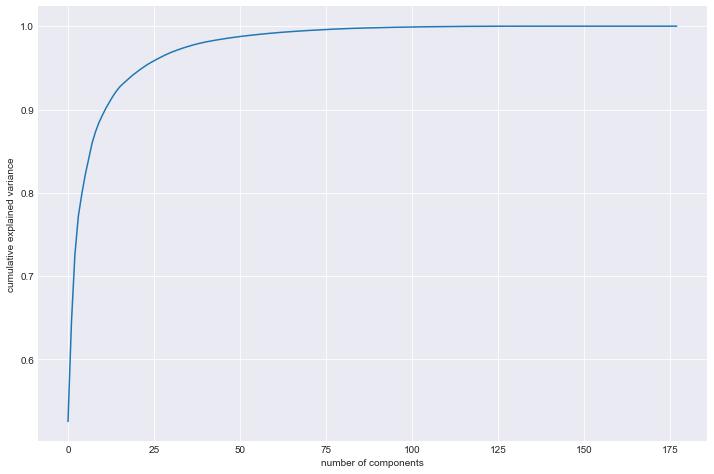

In [630]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [631]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [632]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38618, 35)

In [633]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04327283869968205 , min corr:  -0.04041789451622422


In [634]:

#Applying selected components to the test data - 50 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 35)

#### After PCA we are left with 35 features 
#### Now we will be using this dataframe for further Model buliding and determining wich are te best predictors
#### We will build following models 
##### 1. Logistic Regression 
##### 2. Decision Tree
##### 3. Randon Forest 

### Logistic Regresion 
#### Applying Logistic regression on components

In [635]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [636]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8287
Recall/Sensitivity : 0.8468
AUC Score (Train): 0.901884
CV Score : Mean - 0.9011248 | Std - 0.003789102 | Min - 0.8940377 | Max - 0.9054256


In [637]:
# predictions on Test data

pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.8235259564497234
Sensitivity/Recall : 0.8253333333333334
Specificity: 0.8217185795661132
False Positive Rate: 0.1782814204338868
Positive predictive value: 0.29617224880382775
Negative Predictive value: 0.9810447113297641
sklearn precision score value: 0.29617224880382775


In [638]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8220197755804911
Recall : 0.8253333333333334
Precision : 0.29617224880382775


In [639]:
#Making prediction on the test data

pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.9


In [640]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8287068206535813
Sensitivity/Recall : 0.8467553990367186
Specificity: 0.8106582422704438
False Positive Rate: 0.18934175772955616
Positive predictive value: 0.8172548235529341
Negative Predictive value: 0.8410165484633569
sklearn precision score value: 0.8172548235529341


,churn,churn_Prob,final_predicted
0,0,0.376082,0
1,0,0.102527,0
2,0,0.337340,0
3,0,0.000415,0
4,0,0.077137,0


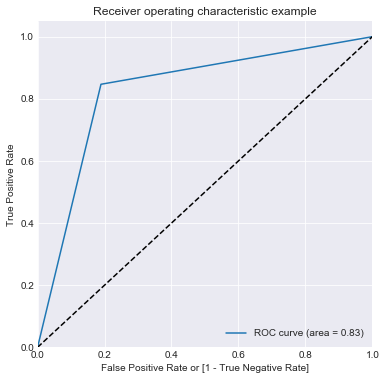

(array([0.        , 0.18934176, 1.        ]),
 array([0.       , 0.8467554, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [641]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [642]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.677197  0.979025  0.375369
0.2   0.2  0.746465  0.956134  0.536796
0.3   0.3  0.791108  0.929981  0.652235
0.4   0.4  0.819877  0.897871  0.741882
0.5   0.5  0.828707  0.846755  0.810658
0.6   0.6  0.828059  0.784039  0.872080
0.7   0.7  0.813170  0.711326  0.915014
0.8   0.8  0.771764  0.594386  0.949143
0.9   0.9  0.589829  0.194521  0.985136


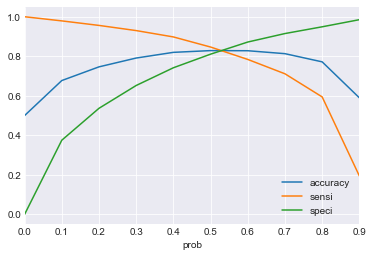

In [643]:

# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [644]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8257030400331452
Sensitivity/Recall : 0.8733233207312652
Specificity: 0.7780827593350251
False Positive Rate: 0.22191724066497487
Positive predictive value: 0.7973803669377719
Negative Predictive value: 0.859988551803091
sklearn precision score value: 0.7973803669377719


,churn,churn_Prob,final_predicted
0,0,0.376082,0
1,0,0.102527,0
2,0,0.337340,0
3,0,0.000415,0
4,0,0.077137,0
5,0,0.030749,0
6,0,0.043913,0
7,0,0.060463,0
8,0,0.285860,0
9,0,0.309944,0


In [645]:

# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8144373611279442
Sensitivity/Recall : 0.8453333333333334
Specificity: 0.7835413889225549
False Positive Rate: 0.21645861107744516
Positive predictive value: 0.2619834710743802
Negative Predictive value: 0.9823734994681659
sklearn precision score value: 0.2619834710743802


,churn,churn_Prob,final_predicted
6102,1,0.693777,1
2539,1,0.553745,1
21576,0,0.077264,0
19574,0,0.329510,0
12804,1,0.783563,1
24030,0,0.091898,0
20273,0,0.211788,0
7538,0,0.056496,0
3196,0,0.048209,0
12935,0,0.265283,0


### Decision Tree

Applying Decision Tree Classifier on Principal components

In [646]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.7963
Recall/Sensitivity : 0.817
AUC Score (Train): 0.863880
CV Score : Mean - 0.8480266 | Std - 0.006253367 | Min - 0.8371957 | Max - 0.8555415


In [647]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7560744960206843
Sensitivity/Recall : 0.7413333333333333
Specificity: 0.7708156587080354
False Positive Rate: 0.2291843412919646
Positive predictive value: 0.22721700040866366
Negative Predictive value: 0.9703997558742753
sklearn precision score value: 0.22721700040866366


In [648]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [649]:

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_d

In [650]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8081814717917905 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [651]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [652]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.8353
Recall/Sensitivity : 0.8471
AUC Score (Train): 0.917809
CV Score : Mean - 0.8908217 | Std - 0.004490925 | Min - 0.8834144 | Max - 0.8966757


In [653]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7716479618632085
Sensitivity/Recall : 0.7346666666666667
Specificity: 0.8086292570597503
False Positive Rate: 0.19137074294024967
Positive predictive value: 0.2586854460093897
Negative Predictive value: 0.9710376946587105
sklearn precision score value: 0.2586854460093897


In [654]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8251
           1       0.26      0.73      0.38       750

    accuracy                           0.80      9001
   macro avg       0.61      0.77      0.63      9001
weighted avg       0.91      0.80      0.84      9001



In [669]:

# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8352840644259154
Sensitivity/Recall : 0.8470661349629707
Specificity: 0.8235019938888601
False Positive Rate: 0.1764980061111399
Positive predictive value: 0.827565270188221
Negative Predictive value: 0.8433754110533573
sklearn precision score value: 0.827565270188221


,churn,churn_Prob,final_predicted
0,0,0.356250,0
1,0,0.057803,0
2,0,0.704918,1
3,0,0.439655,0
4,0,0.352564,0


     prob  accuracy     sensi     speci
0.0   0.0  0.618468  1.000000  0.236936
0.1   0.1  0.721684  0.989901  0.453467
0.2   0.2  0.774302  0.967010  0.581594
0.3   0.3  0.814361  0.928013  0.700710
0.4   0.4  0.831633  0.888964  0.774302
0.5   0.5  0.835284  0.847066  0.823502
0.6   0.6  0.830416  0.792739  0.868093
0.7   0.7  0.814050  0.721684  0.906417
0.8   0.8  0.768579  0.584287  0.952872
0.9   0.9  0.688824  0.393029  0.984619


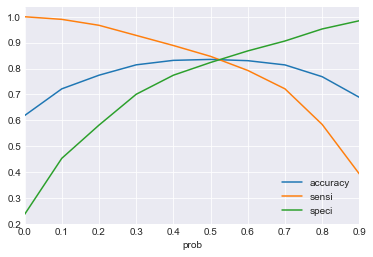

In [670]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [671]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8316329172924544
Sensitivity/Recall : 0.8889636956859496
Specificity: 0.774302138898959
False Positive Rate: 0.22569786110104095
Positive predictive value: 0.7975189332342145
Negative Predictive value: 0.8745832114653408
sklearn precision score value: 0.7975189332342145


,churn,churn_Prob,final_predicted
0,0,0.356250,0
1,0,0.057803,0
2,0,0.704918,1
3,0,0.439655,1
4,0,0.352564,0


In [672]:

#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7660145436916738
Sensitivity/Recall : 0.772
Specificity: 0.7600290873833475
False Positive Rate: 0.23997091261665252
Positive predictive value: 0.22626025791324736
Negative Predictive value: 0.9734554486184415
sklearn precision score value: 0.22626025791324736


,churn,churn_Prob,final_predicted
6102,1,0.224299,0
2539,1,0.898936,1
21576,0,0.321244,0
19574,0,0.025210,0
12804,1,0.860000,1


### Random Forest

Applying Rando Forest Classifer on Principal components with hyperparameters tuning 

In [673]:

def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

In [674]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [675]:
rfgs.cv_results_

{'mean_fit_time': array([13.47206917, 16.78802934, 18.39561181, 19.13243451]),
 'std_fit_time': array([0.45228639, 0.16202018, 0.27547199, 0.18649397]),
 'mean_score_time': array([0.14430194, 0.17773867, 0.19354959, 0.20894732]),
 'std_score_time': array([0.00194106, 0.00205789, 0.00079944, 0.01520806]),
 'param_max_depth': masked_array(data=[10, 15, 20, 25],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10},
  {'max_depth': 15},
  {'max_depth': 20},
  {'max_depth': 25}],
 'split0_test_score': array([0.88271605, 0.93443038, 0.94639463, 0.94746215]),
 'split1_test_score': array([0.89007092, 0.93465695, 0.94545455, 0.94675604]),
 'split2_test_score': array([0.89330784, 0.93667046, 0.94540849, 0.95003824]),
 'split3_test_score': array([0.89315696, 0.93571969, 0.9443038 , 0.94830433]),
 'split4_test_score': array([0.88829922, 0.93141066, 0.94243608, 0.947102  ]),
 'mean_test_score': array([0.8895102 , 0.934577

In [676]:
scores = rfgs.cv_results_
scores["param_max_depth"]
scores["mean_train_score"]
scores["param_max_depth"]
scores["mean_test_score"]

array([0.8895102 , 0.93457763, 0.94479951, 0.94793255])

In [677]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",
                    return_train_score=True)

In [678]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                    

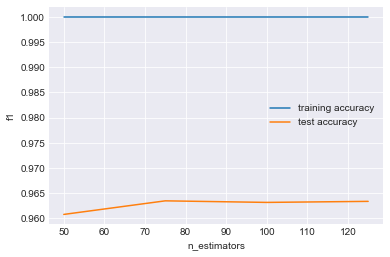

In [679]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [680]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True)

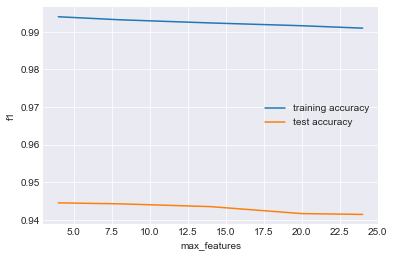

In [681]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

In [682]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

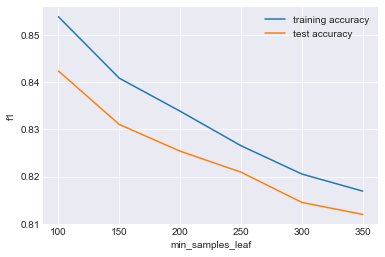

In [683]:

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

In [684]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

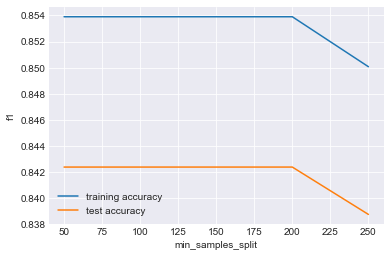

In [685]:

rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

In [686]:

rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [687]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8599
Recall/Sensitivity : 0.865
AUC Score (Train): 0.936049
CV Score : Mean - 0.9194548 | Std - 0.004039899 | Min - 0.9118798 | Max - 0.9234954


In [688]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [689]:

print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8062516866642427
Sensitivity/Recall : 0.7653333333333333
Specificity: 0.8471700399951521
False Positive Rate: 0.1528299600048479
Positive predictive value: 0.3128065395095368
Negative Predictive value: 0.9754395757744907
sklearn precision score value: 0.3128065395095368


In [690]:

# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.859909886581387
Sensitivity/Recall : 0.8650370293645451
Specificity: 0.8547827437982288
False Positive Rate: 0.1452172562017712
Positive predictive value: 0.8562567283539242
Negative Predictive value: 0.8636387420857098
sklearn precision score value: 0.8562567283539242


,churn,churn_Prob,final_predicted
0,0,0.356527,0
1,0,0.164886,0
2,0,0.451685,0
3,0,0.241711,0
4,0,0.152515,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.585090  1.000000  0.170180
0.2   0.2  0.722099  0.995184  0.449013
0.3   0.3  0.803278  0.966544  0.640012
0.4   0.4  0.843700  0.921384  0.766016
0.5   0.5  0.859910  0.865037  0.854783
0.6   0.6  0.847765  0.776840  0.918691
0.7   0.7  0.802476  0.646124  0.958827
0.8   0.8  0.714019  0.443524  0.984515
0.9   0.9  0.563830  0.129111  0.998550


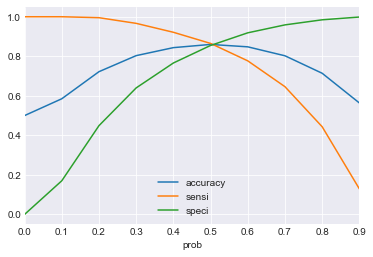

In [691]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [692]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8546014811745819
Sensitivity/Recall : 0.8942979957532756
Specificity: 0.814904966595888
False Positive Rate: 0.18509503340411207
Positive predictive value: 0.8285193359562422
Negative Predictive value: 0.8851822682268227
sklearn precision score value: 0.8285193359562422


,churn,churn_Prob,final_predicted
0,0,0.356527,0
1,0,0.164886,0
2,0,0.451685,1
3,0,0.241711,0
4,0,0.152515,0
5,0,0.084664,0
6,0,0.124283,0
7,0,0.079393,0
8,0,0.190997,0
9,0,0.361576,0


In [693]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8064358259604898
Sensitivity/Recall : 0.804
Specificity: 0.8088716519209793
False Positive Rate: 0.19112834807902074
Positive predictive value: 0.27660550458715594
Negative Predictive value: 0.9784489077847823
sklearn precision score value: 0.27660550458715594


,churn,churn_Prob,final_predicted
6102,1,0.599603,1
2539,1,0.643618,1
21576,0,0.636645,1
19574,0,0.258316,0
12804,1,0.600301,1


### Logistic Regression ( cut-off = 0.45)		
##### Roc_auc_score	
Train - 82.11%	
Test - 81.21%

##### Sensitivity/Recall	
Train - 86.48%	
Test - 84.40%

##### Specificity	
Train - 77.75%	
Test - 78.02%

##### precision	
Train - 79.54%	
Test - 25.04%

### DecisionTree ( cut-off = 0.4)		
##### Roc_auc_score	
Train - 82.41%	
Test -76.57%

##### Sensitivity/Recall	
Train -89.79%	
Test - 78.13%

##### Specificity	
Train - 75.03%	
Test - 75%

##### precision	
Train - 78.24%	
Test - 21.38%


### Random Forest (cut-off = 0.45)		
##### Roc_auc_score	
Train - 85.60%	
Test - 96.53%

##### Sensitivity/Recall	
Train - 88.70%	
Test -77.57%

##### Specificity	
Train - 82.50%	
Test - 81.73%

##### precision	
Train - 83.52%	
Test - 26.97%


### From above it can be concluded that Random Forest performs better than the other models 
The Top features with can which are being the churn influencing factors are 

1. total_ic_mou_8 -- Total incoming minutes of usage in month 8
2. loc_ic_mou_8 -- local incoming minutes of usage in month 8
3. total_month_rech_8 -- Total month recharge amount in month 8
4. total_roam_mou_8 -- Total incoming+outgoing roaming minutes of usage in month 8
5. loc_ic_t2m_mou_8 -- local incoming calls to another operator minutes of usage in month 8